In [1]:
#import kütüphane
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # SVM sınıflandırıcı
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve,auc
from sklearn.metrics import classification_report,matthews_corrcoef,accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("kidney_disease.csv") #Veriseti yükleme
df.drop("id",axis=1,inplace=True) #id sütununu sil
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.shape#kaç satır ve sütundan oluştuğunu göster

(400, 25)

In [4]:
df.columns #verilerin adlarını göster

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.describe()
#describe numerik değerlerin temel istatistik özellikleri analiz etme
#count = veri sayısı
#mean = ortalama değeri
#std = standart sapma
#min = verilerin en düşük değeri
#25 = ilk çeyrekteki medyan(ortanca) değeri
#50 = tüm verideki medyan(ortanca) değeri
#75 = son çeyrekteki medyan(ortanca) değeri
#max = verilerin en yüksek değeri

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
for column in df.columns:
    unique_values = df[column].unique()  # Sütunun benzersiz değerlerini al
    print(f"Sütun: {column}")
    print(f"Değerler: {unique_values}")
    print("-" * 30)

Sütun: age
Değerler: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
------------------------------
Sütun: bp
Değerler: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
------------------------------
Sütun: sg
Değerler: [1.02  1.01  1.005 1.015   nan 1.025]
------------------------------
Sütun: al
Değerler: [ 1.  4.  2.  3.  0. nan  5.]
------------------------------
Sütun: su
Değerler: [ 0.  3.  4.  1. nan  2.  5.]
------------------------------
Sütun: rbc
Değerler: [nan 'normal' 'abnormal']
------------------------------
Sütun: pc
Değerler: ['normal' 'abnormal' nan]
------------------------------
Sütun: pcc
Değerler: ['notpresent' 'present' nan]
------------------------------
Sütun: ba
Değerler: ['notpresent' 'pres

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [8]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
#kategorik ve numerik olarak 2 ye ayırma işlemi
cat_cols=[col for col in df.columns if df[col].dtype=="object"] #kategorik ise
num_cols=[col for col in df.columns if df[col].dtype!="object"] #numerik ise

# Eksik Verilerini Doldurma

In [10]:
mode=SimpleImputer(missing_values = np.nan , strategy = "most_frequent")
df_clean=pd.DataFrame(mode.fit_transform(df))
df_clean.columns=df.columns

In [11]:
df_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
df_clean['pcv'] = pd.to_numeric(df_clean['pcv'], errors='coerce')
df_clean['wc'] = pd.to_numeric(df_clean['wc'], errors='coerce')
df_clean['rc'] = pd.to_numeric(df_clean['rc'], errors='coerce')

In [13]:
df.select_dtypes(exclude = ['object']).columns
for i in df.select_dtypes(exclude = ['object']).columns:
    df_clean[i] = df_clean[i].apply(lambda x: float(x)) 

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             399 non-null    float64
 16  wc              399 non-null    float64
 17  rc              399 non-null    flo

In [15]:
print(df_clean["rc"].mode())
print(df_clean["wc"].mode())
print(df_clean["pcv"].mode())

0    5.2
Name: rc, dtype: float64
0    9800.0
Name: wc, dtype: float64
0    41.0
Name: pcv, dtype: float64


In [16]:
for i in df_clean.columns:
  print("---" , i ,"---")
  print()
  print(set(df[i].tolist()))
  print()

--- age ---

{2.0, 3.0, 4.0, nan, 5.0, 7.0, 8.0, 6.0, nan, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, nan, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, nan, 49.0, nan, nan, nan, nan, nan}

--- bp ---

{140.0, nan, nan, nan, nan, nan, 50.0, 180.0, 60.0, nan, nan, 70.0, 80.0, nan, nan, 90.0, nan, 100.0, nan, nan, 110.0, 120.0}

--- sg ---

{1.02, 1.005, 1.015, 1.01, 1.025, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}

--- al ---

{0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, nan, nan, nan, nan, na

In [17]:
df_clean["classification"] = df_clean["classification"].apply(lambda x :"ckd" if x=="ckd\t" else x)
df_clean["cad"] = df_clean["cad"].apply(lambda x: "no" if x == "\tno" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"no" if x=="\tno" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\tyes" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\yes" else x)
df_clean["rc"] = df_clean["rc"].apply(lambda x :"5.2" if x=="\tno?" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t8400" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t6200" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t?" else x)
df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t?" else x)
df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t43" else x)

In [18]:
encode_data = df_clean.apply(preprocessing.LabelEncoder().fit_transform)

<Axes: >

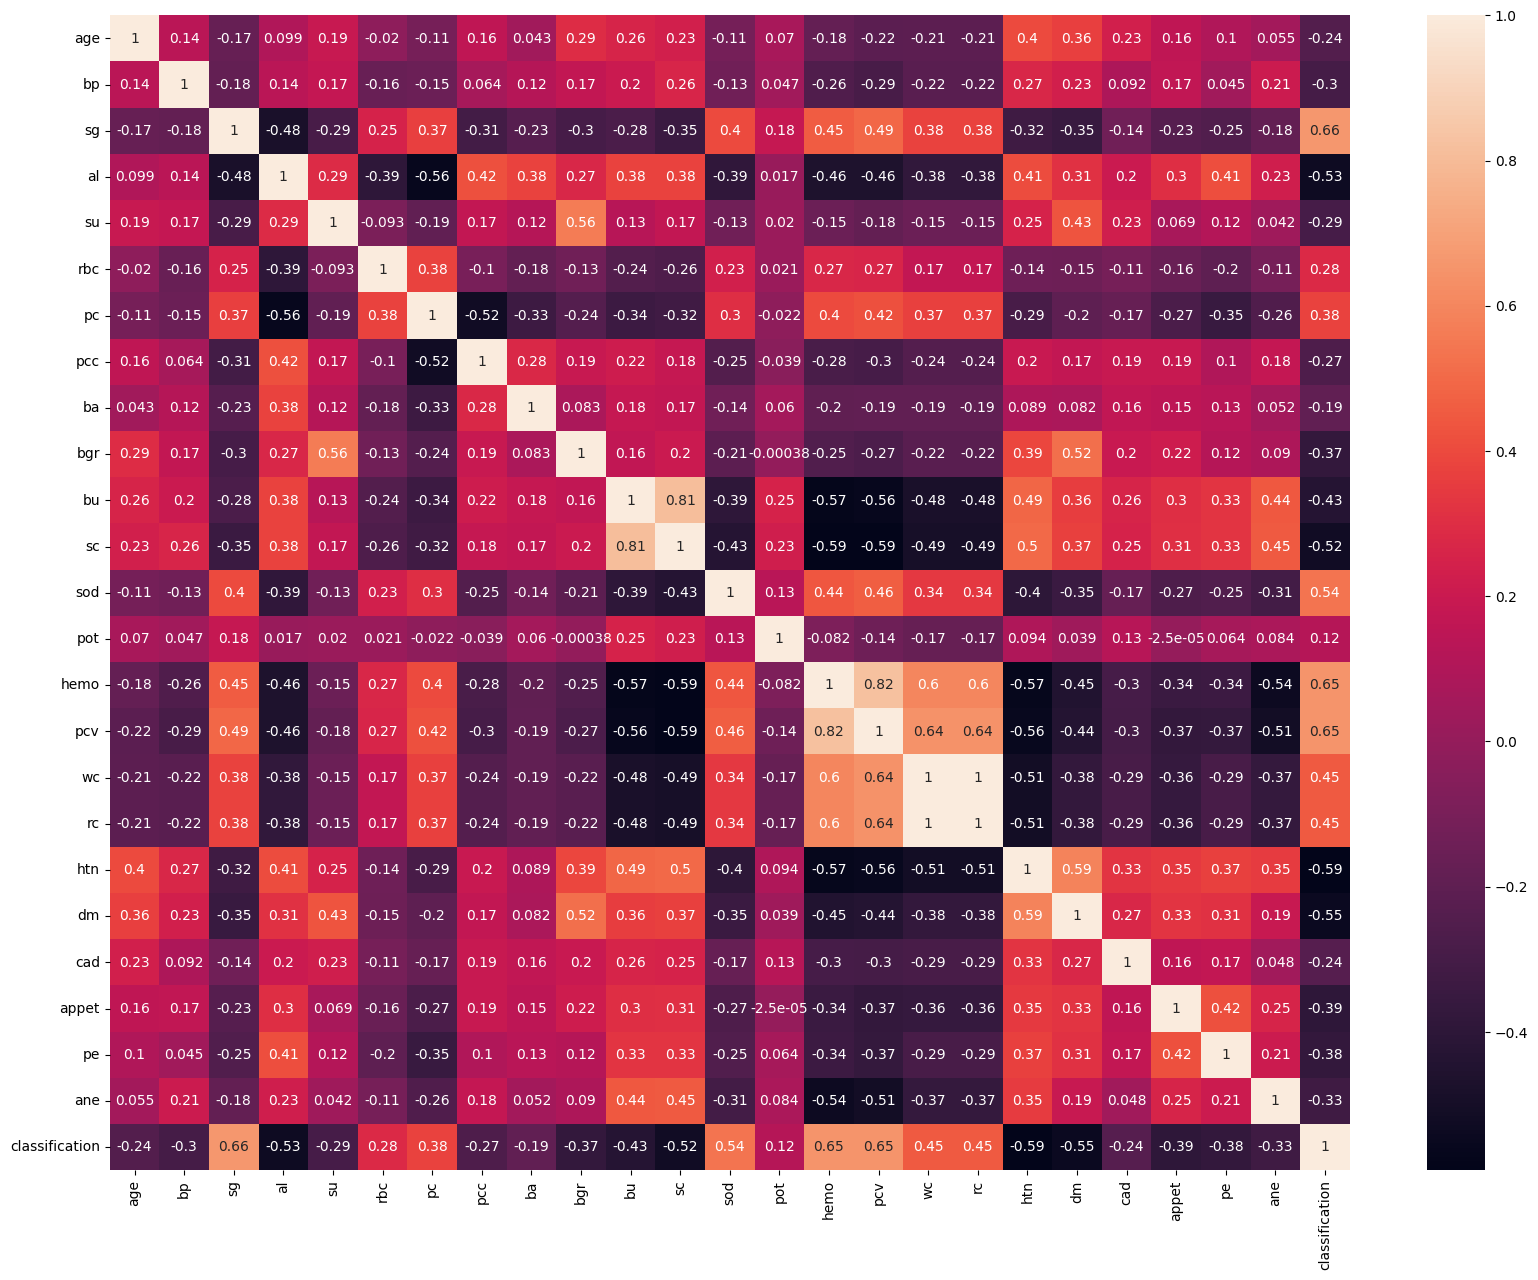

In [19]:
plt.figure(figsize=(20,15))
corr = encode_data.corr()
sns.heatmap(corr, annot = True)

# Model Eğitme

# KNeighborsClassifier

In [20]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [21]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [22]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
tahmin=model.predict(X_test)

In [24]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 50                  0
Class 1                  3                 27

Metrics:
True Positive Rate (Recall): 0.9000
False Positive Rate: 0.0000
Accuracy: %96.2500
Precision: 1.0000
Recall: 0.9000
F1 Score: 0.9474
Matthews Correlation Coefficient (MCC): 0.9214


# DecisionTreeClassifier

In [25]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
tahmin=model.predict(X_test)

In [29]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 49                  1
Class 1                  0                 30

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0200
Accuracy: %98.7500
Precision: 0.9677
Recall: 1.0000
F1 Score: 0.9836
Matthews Correlation Coefficient (MCC): 0.9739


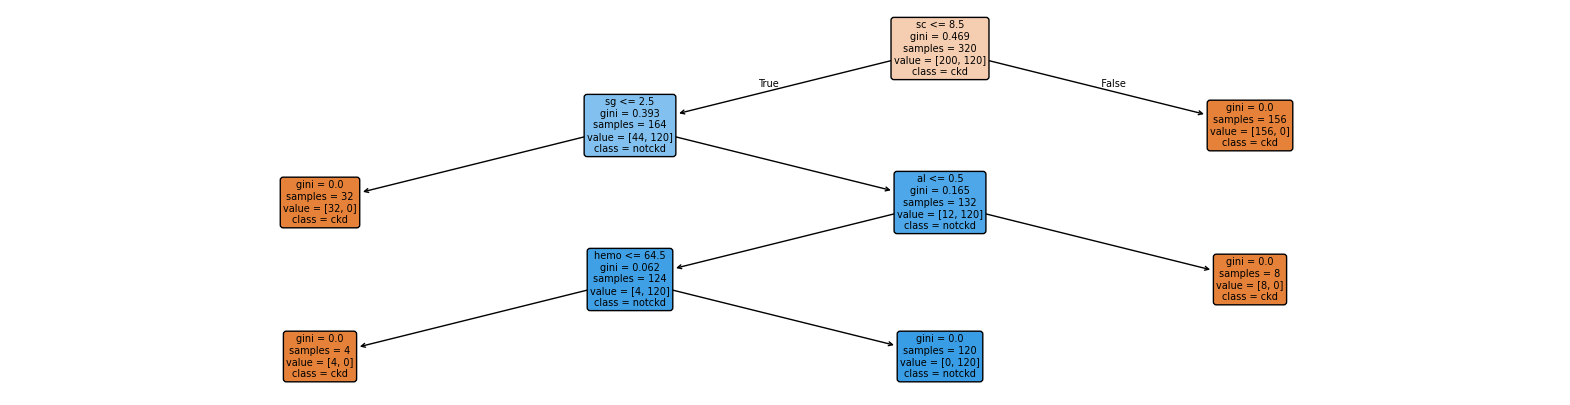

In [30]:
plt.figure(figsize=(20, 5))  # Grafik boyutunu ayarla
plot_tree(model, feature_names=X.columns, class_names=["ckd", "notckd"], filled=True, rounded=True, fontsize=7)
plt.show()

# Multinomial Naive Bayes

In [31]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [33]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [34]:
tahmin = model.predict(X_test)

In [35]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 34                 12
Class 1                  0                 34

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.2609
Accuracy: %85.0000
Precision: 0.7391
Recall: 1.0000
F1 Score: 0.8500
Matthews Correlation Coefficient (MCC): 0.7391


# Support Vector Machines (SVM) 

In [36]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [38]:
model = SVC(kernel='linear')  # Doğrusal kernel ile SVM
model.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
tahmin = model.predict(X_test)

In [40]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 67                  0
Class 1                  0                 53

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0000
Accuracy: %100.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000


# Logistic Regression

In [41]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
tahmin = model.predict(X_test)

In [45]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 65                  2
Class 1                  0                 53

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0299
Accuracy: %98.3333
Precision: 0.9636
Recall: 1.0000
F1 Score: 0.9815
Matthews Correlation Coefficient (MCC): 0.9669


# GaussianNB


In [46]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [49]:
tahmin = model.predict(X_test)

In [50]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 63                  4
Class 1                  0                 53

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0597
Accuracy: %96.6667
Precision: 0.9298
Recall: 1.0000
F1 Score: 0.9636
Matthews Correlation Coefficient (MCC): 0.9350


# MLPClassifier

In [51]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [53]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [54]:
tahmin = model.predict(X_test)

In [55]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 65                  2
Class 1                  0                 53

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0299
Accuracy: %98.3333
Precision: 0.9636
Recall: 1.0000
F1 Score: 0.9815
Matthews Correlation Coefficient (MCC): 0.9669


# LogisticRegression

In [56]:
# Örnek: X veri özellikleri, y hedef değişkeni
X = encode_data.drop('classification', axis=1)  # Özellikler (sütunları ayırın)
y = encode_data['classification']  # Hedef değişken

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [58]:
model = LogisticRegression(random_state=42, max_iter=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=42)

In [59]:
tahmin = model.predict(X_test)

In [60]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, tahmin)
cm_df = pd.DataFrame(cm, index=["Class 0", "Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

# Her sınıf için doğruluk hesaplama
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Hesaplamalar
TPR = TP / (TP + FN)  # Recall veya True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate

F1_Score = f1_score(y_test,tahmin)
acc=accuracy_score(y_test,tahmin)
Recall = recall_score(y_test,tahmin)
MCC = matthews_corrcoef(y_test,tahmin)
Precision = precision_score(y_test,tahmin)
roc_auc = roc_auc_score(y_test,tahmin)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(cm_df)
print("\nMetrics:")
print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Accuracy: %{acc*100:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {MCC:.4f}")

Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                 66                  1
Class 1                  0                 53

Metrics:
True Positive Rate (Recall): 1.0000
False Positive Rate: 0.0149
Accuracy: %99.1667
Precision: 0.9815
Recall: 1.0000
F1 Score: 0.9907
Matthews Correlation Coefficient (MCC): 0.9833
